# Binary Text Classification with CountVectorizer and TF-IDF
Neste projeto, aplicamos um processo de classificação binária de textos, utilizando diferentes vetorizadores (CountVectorizer e TF-IDF) e diferentes classificadores (Regressão Logística, SVM e Naive Bayes). A classificação foi avaliada utilizando validação cruzada e várias métricas de desempenho, como acurácia, precisão, recall e F1 score.

Etapas:
- Processamento de Textos: Pré-processamento e extração de características com vetores.
- Treinamento de Modelos: Aplicação de diferentes classificadores com validação cruzada.
- Avaliação de Desempenho: Análise das métricas e visualização das matrizes de confusão para comparar o desempenho dos modelos.

In [2]:
import os
import sys
import warnings

warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.base import clone
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from scripts.ulteis import preprocess, vectorize

# Processamento de Textos
Nesta seção, carregamos o conjunto de dados, realizamos o pré-processamento e separamos o conjunto de dados em treino e teste.



In [24]:
# Lendo o dataset e separando os dados e as classes
bbc_df = pd.read_csv("../data/bbc_data.csv")

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(bbc_df["data"], bbc_df["labels"], test_size=0.30, random_state=42)

# Preprocessamento
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)


bbc_df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


## Pré-processamento
Para essa etapa fica a escolha a opção de lematizar ou stimizar, em parcular como iremos trabalhar com modelagem de topico mais a fente é mais adaquado para faciliatar a analize lematizar.

In [11]:
# Preprocessamento
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)


print(X_train[22], '\n')
print(X_test[29], '\n')

producer scoop stage award producer beaten mary poppins battle blockbuster west end musical olivier award producer three prize uk prestigious annual theatre award mary poppins two mel brook hit show triumphed battle best new musical mary poppins andrew lloyd webbers woman white alan bennett history boy big winner straight theatre category picking three trophy eye musical prize producer mary poppins woman white high profile opening last six month producer nathan lane last minute replacement richard dreyfus beat former co star lee evans win best musical actor lane already left production smash hit broadway moving london show also best musical performance supporting role conleth hill play director roger debris mary poppins award came best choreography best musical actress star laura michelle kelly led nomination going sunday ceremony london hilton hotel nine award show stage adaptation film history boy set grammar school early partly based bennett experience teacher named best new play al

## Vetorização dos Textos com CountVectorizer e TF-IDF
Aqui, vetorizamos os textos utilizando tanto o CountVectorizer quanto o TF-IDF, gerando representações numéricas dos textos para serem utilizados nos classificadores.

In [17]:
# Vectors Bag of words
cv = CountVectorizer()
cv_df, cv_df_test = vectorize(cv,X_train, X_test)

# Vectors TF-IDF
tfidf = TfidfVectorizer()
tfidf_df, tfidf_df_test = vectorize(tfidf,X_train, X_test)



# Treinamento e Avaliação dos Modelos
Aqui, treinamos três classificadores diferentes: Regressão Logística, SVM e Naive Bayes, utilizando os vetores gerados por CountVectorizer e TF-IDF. Em seguida, são avaliadas as métricas para cada modelo.

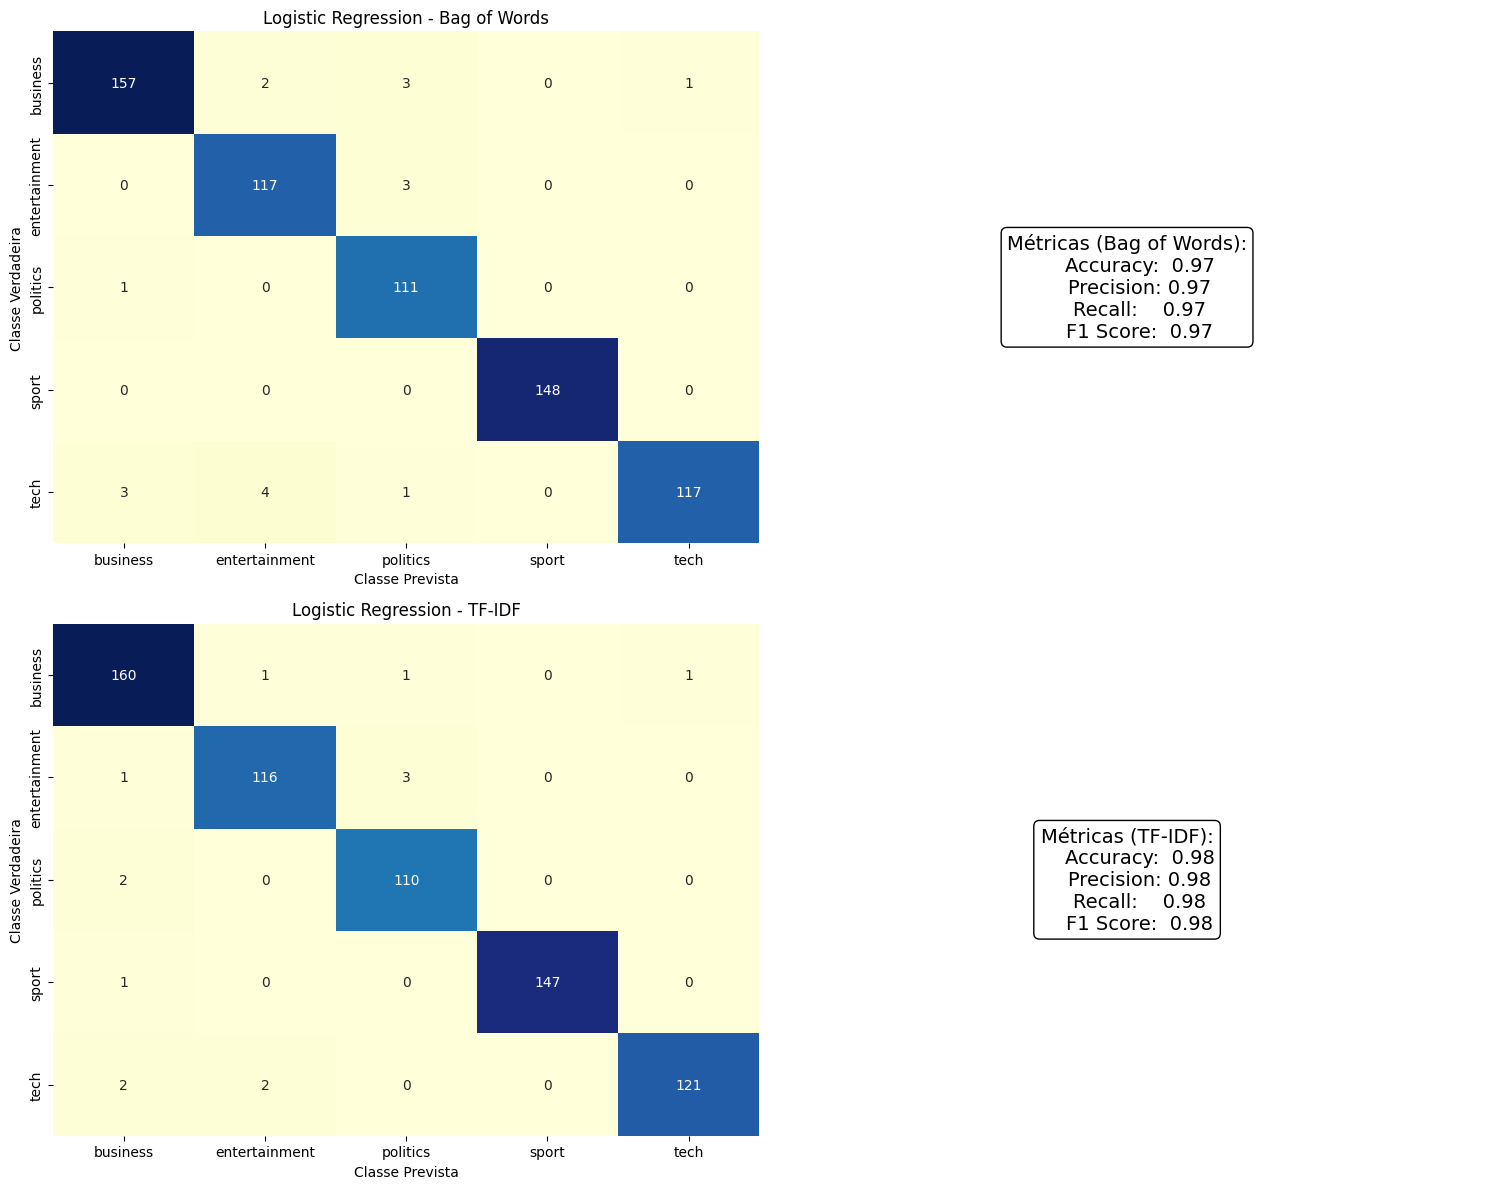

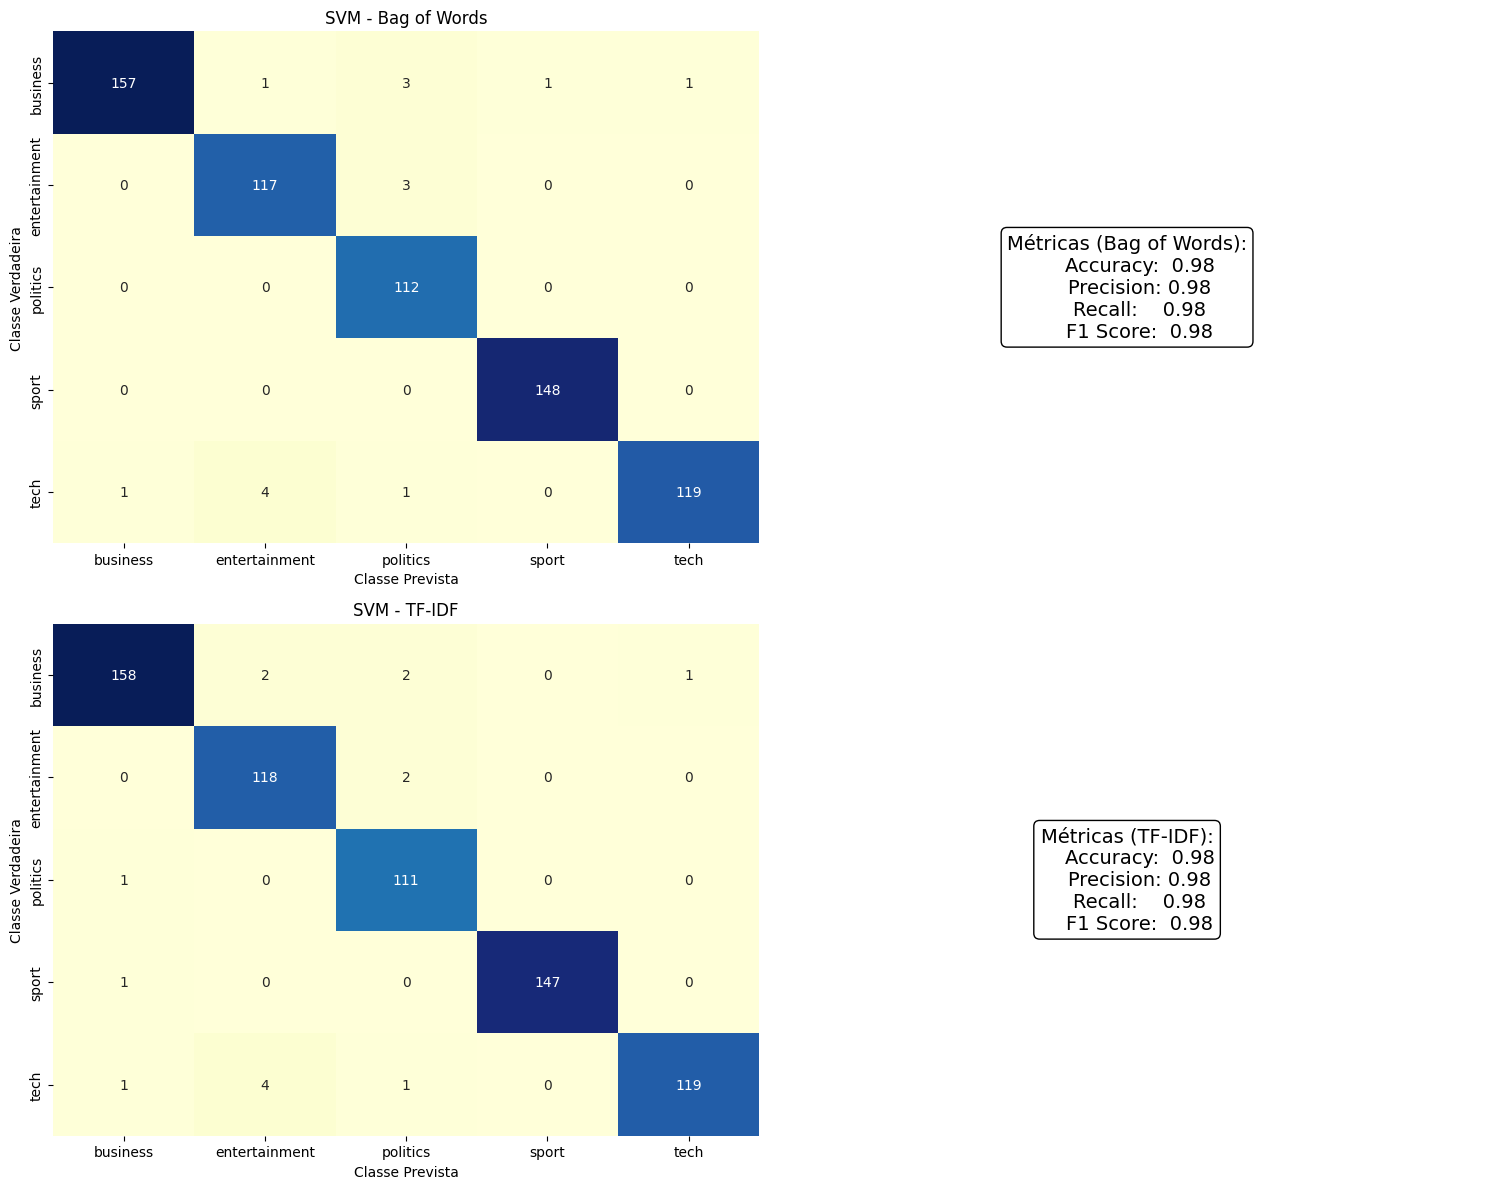

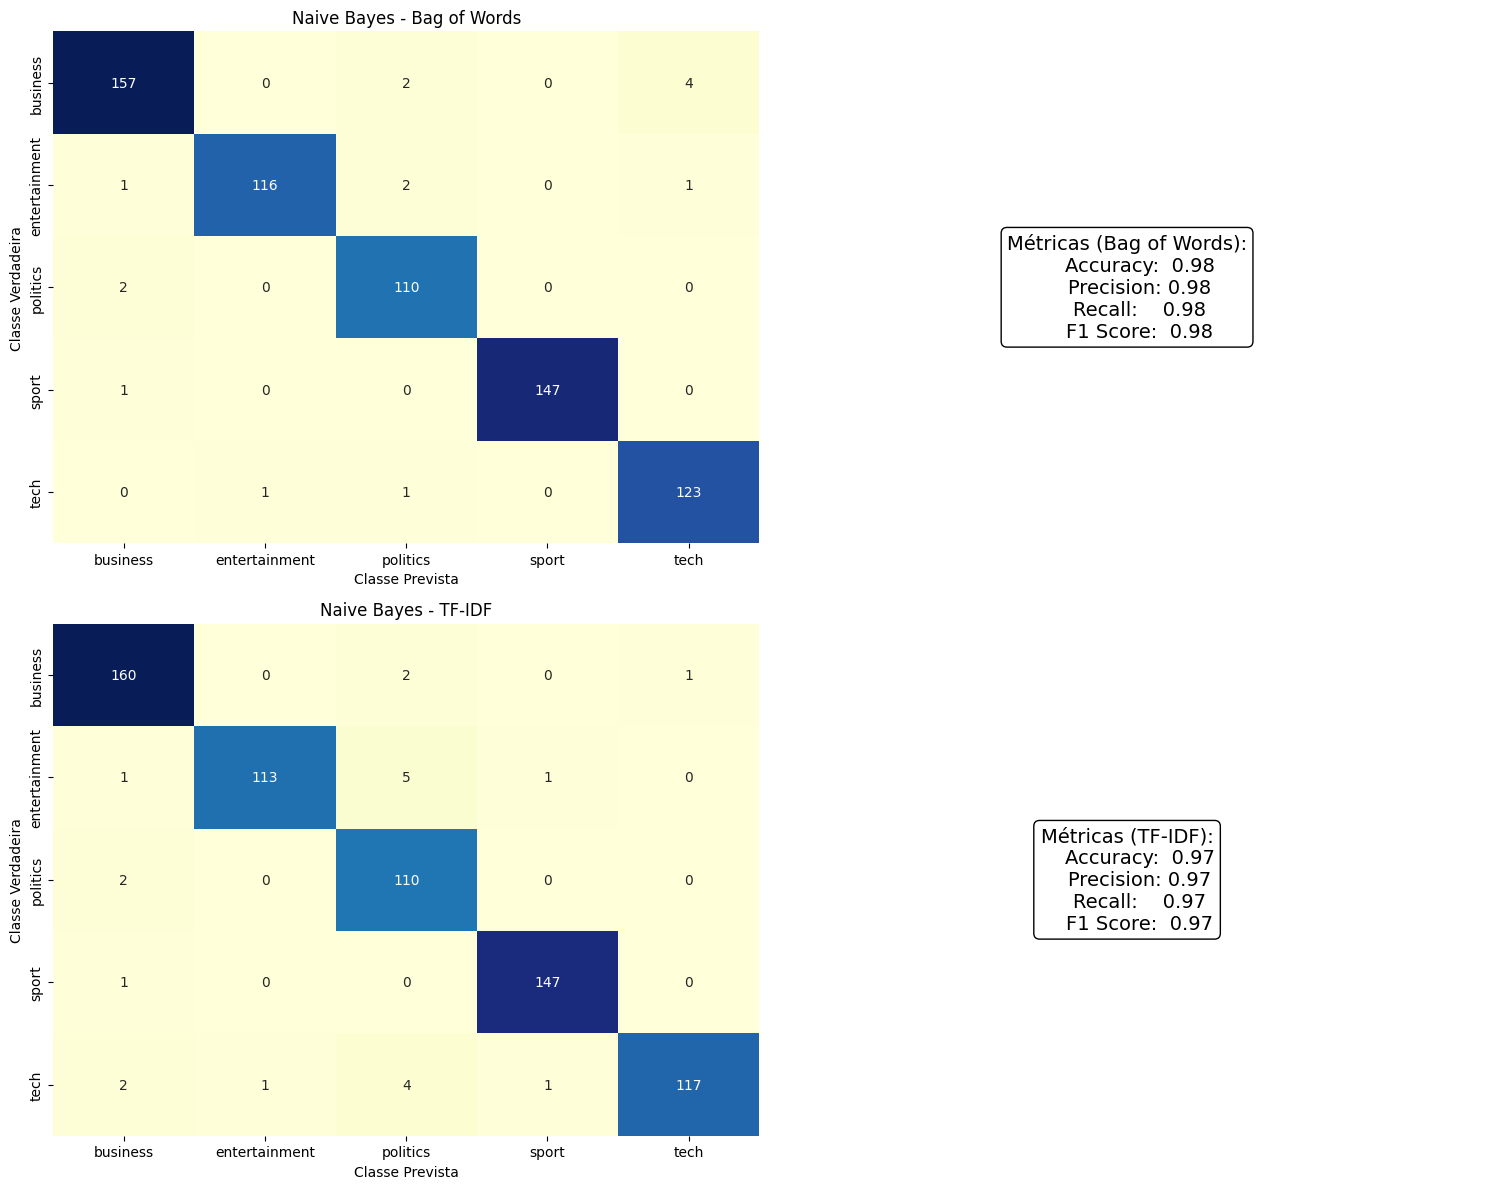

In [27]:
def metrics_describe(model_cv, model_tfidf, y_test, df_test_cv, df_test_tfidf, model_name):
    y_pred_cv = model_cv.predict(df_test_cv)
    y_pred_tfidf = model_tfidf.predict(df_test_tfidf)
    
    # Metrics para Bag of Words
    accuracy_cv = accuracy_score(y_test, y_pred_cv)
    precision_cv = precision_score(y_test, y_pred_cv, average="weighted")
    recall_cv = recall_score(y_test, y_pred_cv, average="weighted")
    f1_cv = f1_score(y_test, y_pred_cv, average="weighted")
    conf_matrix_cv = confusion_matrix(y_test, y_pred_cv)

    # Metrics para TF-IDF
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    precision_tfidf = precision_score(y_test, y_pred_tfidf, average="weighted")
    recall_tfidf = recall_score(y_test, y_pred_tfidf, average="weighted")
    f1_tfidf = f1_score(y_test, y_pred_tfidf, average="weighted")
    conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
    
    # Plot com gráficos 3x2 (3 modelos e 2 vetorizadores)
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 3x2 grid
    
    # Classes
    classes = model_cv.classes_
    
    # Bag of Words - Matriz de Confusão
    sns.heatmap(conf_matrix_cv, annot=True, cmap="YlGnBu", fmt="d", cbar=False, ax=axes[0, 0], 
                xticklabels=classes, yticklabels=classes)
    axes[0, 0].set_title(f'{model_name} - Bag of Words')
    axes[0, 0].set_xlabel('Classe Prevista')
    axes[0, 0].set_ylabel('Classe Verdadeira')
    
    # TF-IDF - Matriz de Confusão
    sns.heatmap(conf_matrix_tfidf, annot=True, cmap="YlGnBu", fmt="d", cbar=False, ax=axes[1,0 ], 
                xticklabels=classes, yticklabels=classes)
    axes[1, 0].set_title(f'{model_name} - TF-IDF')
    axes[1, 0].set_xlabel('Classe Prevista')
    axes[1, 0].set_ylabel('Classe Verdadeira')
    
    # Métricas para Bag of Words
    metrics_text_cv = f"""Métricas (Bag of Words):
    Accuracy:  {accuracy_cv:.2f}
    Precision: {precision_cv:.2f}
    Recall:    {recall_cv:.2f}
    F1 Score:  {f1_cv:.2f}"""
    axes[0, 1].text(0.5, 0.5, metrics_text_cv, fontsize=14, ha='center', va='center', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    axes[0, 1].axis('off')
    
    # Métricas para TF-IDF
    metrics_text_tfidf = f"""Métricas (TF-IDF):
    Accuracy:  {accuracy_tfidf:.2f}
    Precision: {precision_tfidf:.2f}
    Recall:    {recall_tfidf:.2f}
    F1 Score:  {f1_tfidf:.2f}"""
    axes[1, 1].text(0.5, 0.5, metrics_text_tfidf, fontsize=14, ha='center', va='center', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    axes[1, 1].axis('off')

    # Ajuste de layout
    plt.tight_layout()
    plt.show()

# Função para treinar os modelos e gerar os gráficos
def run_models():
    # Vectors Bag of words
    cv = CountVectorizer()
    cv_df = cv.fit_transform(X_train)
    cv_df_test = cv.transform(X_test)

    # Vectors TF-IDF
    tfidf = TfidfVectorizer()
    tfidf_df = tfidf.fit_transform(X_train)
    tfidf_df_test = tfidf.transform(X_test)

    # Modelos utilizados
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "SVM": LinearSVC(),
        "Naive Bayes": MultinomialNB()
    }

    for model_name, model in classifiers.items():
        # Criando copia do modelo para BoW e TFIDF
        model_cv = clone(model)
        model_tfidf = clone(model)
        
        # Treinando o modelo com Bag of Words
        model_cv.fit(cv_df, y_train)
    
        # Treinando o modelo com TF-IDF
        model_tfidf.fit(tfidf_df, y_train)
        # Gerar gráficos para Bag of Words e TF-IDF
        
        metrics_describe(model_cv, model_tfidf, y_test, cv_df_test, tfidf_df_test, model_name)
# Chamando a função para rodar os modelos
run_models()


# Conclusão:
Após comparar o desempenho dos três classificadores — SVM, Naive Bayes, e Regressão Logística — com as representações Bag of Words e TF-IDF, observamos que o SVM apresentou a maior consistência em ambos os métodos de vetorização, alcançando alta precisão e recall. O Naive Bayes demonstrou um desempenho ligeiramente inferior ao usar TF-IDF, indicando que a técnica de Bag of Words pode ser mais adequada para este modelo. A Regressão Logística foi igualmente eficaz com ambos os métodos. Assim, a escolha entre Bag of Words e TF-IDF dependerá da natureza dos dados e do classificador utilizado, mas ambos se mostraram eficientes para essa tarefa de classificação de textos.